# ANÁLISIS COMPLETO - PROYECTO TIENDA AURELION

Este notebook contiene la documentación completa del proyecto Tienda-Aurelion,
incluyendo tema, problema, solución, dataset, y análisis estadístico completo
con exploración de datos, limpieza, unificación de tablas y conclusiones.

## 1. DOCUMENTACIÓN

### 1.1. Tema, Problema y Solución

**TEMA:** Gestión de una Tienda a partir de datos sintéticos.

**PROBLEMA:** ¿Cuál es el medio de pago más utilizado por los clientes?

**SOLUCIÓN:** Análisis estadístico completo para identificar medios de pago predominantes.

### 1.2. Dataset de Referencia

**Fuente:** Datos sintéticos educativos (Guayerd + IBM)

**Estructura:** 4 tablas principales
- **Productos:** ~100 registros (id, nombre, categoría, precio)
- **Clientes:** ~100 registros (id, nombre, ciudad, fecha_alta)
- **Ventas:** ~120 registros (id_venta, fecha, id_cliente, medio_pago)
- **Detalle Ventas:** ~300 registros (id_venta, id_producto, cantidad, importe)

**Productos** (productos.csv) ~ 100 filas
| Campo           | Tipo  | Escala    |
| --------------- | ----- | --------- |
| id_producto     | int   | Nominal   |
| nombre_producto | str   | Nominal   |
| categoria       | str   | Nominal   |
| precio_unitario | int   | Razón     |

**Clientes** (clientes.csv) ~ 100 filas
| Campo           | Tipo  | Escala    |
| --------------- | ----- | --------- |
| id_cliente      | int   | Nominal   |
| nombre_cliente  | str   | Nominal   |
| ciudad          | str   | Nominal   |
| fecha_alta      | date  | Intervalo |

**Ventas** (ventas.csv) ~ 120 filas
| Campo           | Tipo  | Escala    |
| --------------- | ----- | --------- |
| id_venta        | int   | Nominal   |
| fecha           | dat   | Intervalo |
| id_cliente      | int   | Nominal   |
| nombre_cliente  | strin | Nominal   |
| email           | str   | Nominal   |
| medio_pago      | str   | Nominal   |

**Detalle Ventas** (detalle_ventas.csv) ~ 300 filas
| Campo           | Tipo  | Escala    |
| --------------- | ----- | --------- |
| id_venta        | int   | Nominal   |
| id_producto     | int   | Nominal   |
| nombre_producto | str   | Nominal   |
| cantidad        | int   | Razón     |
| precio_unitario | str   | Razón     |
| importe         | int   | Razón     |

**Tabla Unificada:** `tabla_unificada.csv` (generada mediante joins)

### 1.3. Pasos, Pseudocódigo y Diagrama del programa

#### Pasos

1) Mostrar un menú numérico con las opciones disponibles.
2) Imprimir un texto en pantalla asociado a la opción escogida por el usuario.
3) Mantener acceso al menú hasta escoger la opción "Salir".
4) Devolver al usuario un mensaje de "Opción no válida. Intenta de nuevo." en caso de insertar un valor numérico distinto a los que están disponibles en el menú.

#### Pseudocódigo

In [ ]:
# Escrito en modo lenguaje de celda para facilitar la comprensión (ejecución no funcional)
INICIO
    Mientras True:
        Mostrar opciones:
            1.  Abrir README.md
            2.  Tema, problema y solución
            3.  Dataset de referencia
            4.  Pasos, pseudocódigo y diagrama
            5.  Sugerencias y mejoras con Copilot
            6.  Cargar tabla_unificada.csv y ejecutar documentación
            7.  Visualizar tabla unificada (shape, columnas, muestra, nulos)
            8.  Resultados estadísticos generales (describe)
            9.  Medios de pago: conteo y porcentaje
            10. Matriz de correlaciones (tabla + heatmap)
            11. Detección de outliers (IQR)
            12. Gráfico: Frecuencia de medios de pago
            13. Gráfico: Distribución de importe
            14. Gráfico: Boxplot de importe por medio de pago
            15. Salir
        Leer opción
        Si opción == 15:
            Romper bucle
        Sino si opción >= 1 y opción <= 14:
            Imprimir texto asociado
        Sino:
            Imprimir 'Opción inválida'
FIN

#### Diagrama de flujo: archivo "Diagrama_Flujo.png" ubicado en la subcarpeta /assets del proyecto

### 1.4. Sugerencias y mejoras aplicadas con COPILOT


- En Programa.py, se creó un menú con 15 opciones que imprime texto asociado a la opción elegida.
- En Analisis_Completo.ipynb, se optimizó el pseudocódigo para que, en caso de ingresar un valor numérico distinto a los del menú, imprima "Opción inválida".

In [ ]:
%pip install matplotlib seaborn scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, skew, kurtosis

Note: you may need to restart the kernel to use updated packages.


In [ ]:
path = "../data/"
clientes = pd.read_excel(path + "clientes.xlsx")
productos = pd.read_excel(path + "productos.xlsx")
ventas = pd.read_excel(path + "ventas.xlsx")
detalle = pd.read_excel(path + "detalle_ventas.xlsx")
print("Datos cargados exitosamente")

Datos cargados exitosamente


In [ ]:
print("Ventas shape:", ventas.shape)
print("Detalle shape:", detalle.shape)
print("Clientes shape:", clientes.shape)
print("Productos shape:", productos.shape)
print("\nColumnas por tabla:")
for df, name in [(ventas, 'ventas'), (detalle, 'detalle'), (clientes, 'clientes'), (productos, 'productos')]:
    print(f"{name}: {df.columns.tolist()}")

Ventas shape: (120, 6)
Detalle shape: (343, 6)
Clientes shape: (100, 5)
Productos shape: (100, 5)

Columnas por tabla:
ventas: ['id_venta', 'fecha', 'id_cliente', 'nombre_cliente', 'email', 'medio_pago']
detalle: ['id_venta', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe']
clientes: ['id_cliente', 'nombre_cliente', 'email', 'ciudad', 'fecha_alta']
productos: ['id_producto', 'nombre_producto', 'categoria', 'precio_unitario', 'categoria_corregida']


##### Analizar Tipos de valores

In [ ]:
for df, name in [(ventas,"ventas"), (detalle,"detalle"), (clientes,"clientes"), (productos,"productos")]:    
    print(f"\n{name} - dtypes:")
    display(df.dtypes)


ventas - dtypes:


id_venta                   int64
fecha             datetime64[ns]
id_cliente                 int64
nombre_cliente            object
email                     object
medio_pago                object
dtype: object


detalle - dtypes:


id_venta             int64
id_producto          int64
nombre_producto     object
cantidad             int64
precio_unitario      int64
importe            float64
dtype: object


clientes - dtypes:


id_cliente                 int64
nombre_cliente            object
email                     object
ciudad                    object
fecha_alta        datetime64[ns]
dtype: object


productos - dtypes:


id_producto             int64
nombre_producto        object
categoria              object
precio_unitario         int64
categoria_corregida    object
dtype: object

##### Búsqueda de valores faltantes (Nulos)

In [ ]:
for df, name in [(ventas,"ventas"), (detalle,"detalle"), (clientes,"clientes"), (productos,"productos")]:
    print(f"\n{name} - nulos por columna:\n", df.isnull().sum())


ventas - nulos por columna:
 id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64

detalle - nulos por columna:
 id_venta           0
id_producto        0
nombre_producto    0
cantidad           0
precio_unitario    0
importe            5
dtype: int64

clientes - nulos por columna:
 id_cliente        0
nombre_cliente    0
email             0
ciudad            0
fecha_alta        0
dtype: int64

productos - nulos por columna:
 id_producto            0
nombre_producto        0
categoria              0
precio_unitario        0
categoria_corregida    0
dtype: int64


In [ ]:
# Corrección de categorías
keywords_alimentos = ['gallet', 'harina', 'fideo', 'aceite', 'azúcar', 'yerba',
                      'arroz', 'leche', 'pan', 'helado', 'coca', 'pepsi', 'sprite',
                      'fanta', 'agua', 'medialuna', 'aceituna', 'tostada', 'café',
                      'vino', 'fernet', 'cerveza', 'hamburguesa', 'mayonesa',
                      'queso', 'jamón', 'salchicha', 'tomate', 'arveja']

def corregir_categoria(nombre):
    nombre_lower = nombre.lower()
    for palabra in keywords_alimentos:
        if palabra in nombre_lower:
            return 'Alimentos'
    return 'Limpieza'

productos['categoria_corregida'] = productos['nombre_producto'].apply(corregir_categoria)
print('Categorías corregidas:')
print(productos['categoria_corregida'].value_counts())

Categorías corregidas:
categoria_corregida
Limpieza     60
Alimentos    40
Name: count, dtype: int64


##### Búsqueda de duplicados

In [ ]:
for df, name in zip([clientes, productos, ventas, detalle],
                    ['Clientes', 'Productos', 'Ventas', 'Detalle Ventas']):
    print(f"{name}:")
    print(df.duplicated().sum(), "duplicados\n")

Clientes:
0 duplicados

Productos:
0 duplicados

Ventas:
0 duplicados

Detalle Ventas:
0 duplicados



In [ ]:
print('Resumen del análisis:')  
print(f'Total de registros de detalle: {detalle.shape[0]}')
print(f'Medios de pago únicos: {ventas["medio_pago"].nunique()}')
print(f'\nMedios de pago más utilizados:')
print(ventas['medio_pago'].value_counts())

Resumen del análisis:
Total de registros de detalle: 343
Medios de pago únicos: 4

Medios de pago más utilizados:
medio_pago
efectivo         37
qr               30
transferencia    27
tarjeta          26
Name: count, dtype: int64


## 2. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

### 1. Importación de Recursos

In [2]:
# Instalando librerías
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn

# Importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 2. Análisis de Datos

#### 2.1. Lectura y Visualización de Datos

##### ➤ Carga y Lectura de Datos

In [3]:
# Ruta de la base de datos
path = "../data/"

# Lectura de datos 
clientes = pd.read_excel(path + "clientes.xlsx")
productos = pd.read_excel(path + "productos.xlsx")
ventas = pd.read_excel(path + "ventas.xlsx")
detalle = pd.read_excel(path + "detalle_ventas.xlsx")

##### ➤ Visualización e Inspección rápida de Datos

In [4]:
# Vista rápida
print("---- Ventas ----")
print(ventas.shape)
display(ventas.head())
print("\nColumnas Ventas:", ventas.columns.to_list())

print("\n---- Detalle ----")
print(detalle.shape)
display(detalle.head())
print("\nColumnas Detalle:", detalle.columns.to_list())

print("\n---- Clientes ----")
print(clientes.shape)
display(clientes.head())
print("\nColumnas Clientes:", clientes.columns.to_list())

print("\n---- Productos ----")
print(productos.shape)
display(productos.head())
print("\nColumnas Productos:", productos.columns.to_list())

---- Ventas ----
(120, 6)


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta



Columnas Ventas: ['id_venta', 'fecha', 'id_cliente', 'nombre_cliente', 'email', 'medio_pago']

---- Detalle ----
(343, 6)


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902,NaN
1,2,82,Aceitunas Negras 200g,5,2394,NaN
2,2,39,Helado Vainilla 1L,5,469,NaN
3,2,70,Fernet 750ml,2,4061,NaN
4,2,22,Medialunas de Manteca,1,2069,NaN



Columnas Detalle: ['id_venta', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe']

---- Clientes ----
(100, 5)


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05



Columnas Clientes: ['id_cliente', 'nombre_cliente', 'email', 'ciudad', 'fecha_alta']

---- Productos ----
(100, 4)


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777



Columnas Productos: ['id_producto', 'nombre_producto', 'categoria', 'precio_unitario']


##### ➤ Revisar Tipos y Nulos

In [5]:
for df, name in [(ventas,"ventas"), (detalle,"detalle"), (clientes,"clientes"), (productos,"productos")]:
    print(f"\n{name} - dtypes:")
    display(df.dtypes)
    print(f"{name} - nulos por columna:\n", df.isnull().sum())


ventas - dtypes:


id_venta                   int64
fecha             datetime64[ns]
id_cliente                 int64
nombre_cliente            object
email                     object
medio_pago                object
dtype: object

ventas - nulos por columna:
 id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64

detalle - dtypes:


id_venta             int64
id_producto          int64
nombre_producto     object
cantidad             int64
precio_unitario      int64
importe            float64
dtype: object

detalle - nulos por columna:
 id_venta           0
id_producto        0
nombre_producto    0
cantidad           0
precio_unitario    0
importe            5
dtype: int64

clientes - dtypes:


id_cliente                 int64
nombre_cliente            object
email                     object
ciudad                    object
fecha_alta        datetime64[ns]
dtype: object

clientes - nulos por columna:
 id_cliente        0
nombre_cliente    0
email             0
ciudad            0
fecha_alta        0
dtype: int64

productos - dtypes:


id_producto         int64
nombre_producto    object
categoria          object
precio_unitario     int64
dtype: object

productos - nulos por columna:
 id_producto        0
nombre_producto    0
categoria          0
precio_unitario    0
dtype: int64


##### ➤ Búsqueda de Duplicados

In [6]:
for df, name in zip([clientes, productos, ventas, detalle],
                    ['Clientes', 'Productos', 'Ventas', 'Detalle Ventas']):
    print(f"{name}:")
    print(df.duplicated().sum(), "duplicados\n")


Clientes:
0 duplicados

Productos:
0 duplicados

Ventas:
0 duplicados

Detalle Ventas:
0 duplicados



#### 2.2. Limpieza de Datos

##### ➤ Limpieza y Corrección de Categorías

In [7]:
# Valores únicos actuales
print("Valores únicos actuales en 'categoria':")
print(productos["categoria"].unique())

# Conteo por categoría
print("\nConteo de productos por categoría:")
print(productos["categoria"].value_counts())

# Detección de incoherencias por nombre del producto
# (asumimos que si el nombre contiene ciertas palabras, pertenece a 'Alimentos')
keywords_alimentos = [
    "gallet", "harina", "fideo", "aceite", "azúcar", "yerba",
    "arroz", "leche", "pan", "helado", "coca", "pepsi", "sprite",
    "fanta", "agua", "medialuna", "aceituna", "tostada", "café",
    "vino", "fernet", "cerveza", "hamburguesa", "mayonesa",
    "queso", "jamón", "salchicha", "tomate", "arveja"
]

# Creamos una nueva columna con la categoría corregida
def corregir_categoria(nombre):
    nombre_lower = nombre.lower()
    for palabra in keywords_alimentos:
        if palabra in nombre_lower:
            return "Alimentos"
    return "Limpieza"

productos["categoria_corregida"] = productos["nombre_producto"].apply(corregir_categoria)

# Comprobamos resultado
print("\n✅ Categorías corregidas:")
print(productos["categoria_corregida"].value_counts())

# Mostramos algunas diferencias antes/después
print("\nEjemplos de correcciones realizadas:")
display(productos.loc[productos["categoria"] != productos["categoria_corregida"], 
                      ["nombre_producto", "categoria", "categoria_corregida"]].head(10))


Valores únicos actuales en 'categoria':
['Alimentos' 'Limpieza']

Conteo de productos por categoría:
categoria
Alimentos    50
Limpieza     50
Name: count, dtype: int64

✅ Categorías corregidas:
categoria_corregida
Limpieza     60
Alimentos    40
Name: count, dtype: int64

Ejemplos de correcciones realizadas:


,nombre_producto,categoria,categoria_corregida
1,Pepsi 1.5L,Limpieza,Alimentos
3,Fanta Naranja 1.5L,Limpieza,Alimentos
6,Jugo de Manzana 1L,Alimentos,Limpieza
9,Yerba Mate Intensa 1kg,Limpieza,Alimentos
12,Té Verde 20 saquitos,Alimentos,Limpieza
13,Leche Entera 1L,Limpieza,Alimentos
17,Queso Rallado 150g,Limpieza,Alimentos
18,Manteca 200g,Alimentos,Limpieza
19,Pan Lactal Blanco,Limpieza,Alimentos
21,Medialunas de Manteca,Limpieza,Alimentos


##### ➤ Imputar valores faltantes

In [8]:
# Imputar valores faltantes en la columna "importe"
print("\n🔧 Imputando valores faltantes en la columna 'importe'...")
nulos_antes = detalle["importe"].isna().sum()
print(f"   - Valores nulos antes de la imputación: {nulos_antes}")

# Calcular importe como cantidad * precio_unitario donde importe es nulo
detalle["importe"] = detalle.apply(
    lambda row: row["cantidad"] * row["precio_unitario"] 
    if pd.isna(row["importe"]) else row["importe"],
    axis=1
)

nulos_despues = detalle["importe"].isna().sum()
print(f"   - Valores nulos después de la imputación: {nulos_despues}")
print(f"   - Se imputaron {nulos_antes - nulos_despues} valores faltantes")


🔧 Imputando valores faltantes en la columna 'importe'...
   - Valores nulos antes de la imputación: 5
   - Valores nulos después de la imputación: 0
   - Se imputaron 5 valores faltantes


#### 2.3. Unión de Tablas

##### ➤ Unión de tablas en cascada

In [9]:
# 1️⃣ Unimos Productos → Detalle
print("1️⃣ Uniendo 'productos' con 'detalle'...")

detalle_productos = detalle.merge(
    productos[["id_producto", "categoria_corregida", "precio_unitario"]],
    on="id_producto",
    how="left",
    suffixes=("", "_producto")
)

print("Forma resultante (detalle_productos):", detalle_productos.shape)
print("Columnas resultantes:")
print(detalle_productos.columns.tolist())

# 2️⃣ Unimos el resultado con Ventas
print("\n2️⃣ Uniendo con tabla 'ventas'...")

detalle_ventas = detalle_productos.merge(
    ventas[["id_venta", "fecha", "id_cliente", "medio_pago"]],
    on="id_venta",
    how="left"
)

print("Forma resultante (detalle_ventas):", detalle_ventas.shape)
print("Columnas resultantes:")
print(detalle_ventas.columns.tolist())

# 3️⃣ Finalmente, unimos con Clientes (INCLUYE nombre_cliente)
print("\n3️⃣ Uniendo con tabla 'clientes'...")

df_maestro = detalle_ventas.merge(
    clientes[["id_cliente", "nombre_cliente", "ciudad", "fecha_alta"]],  # ✅ Agregado nombre_cliente
    on="id_cliente",
    how="left"
)

print("Forma final del DataFrame maestro:", df_maestro.shape)
print("\nColumnas finales:")
print(df_maestro.columns.tolist())

# 🔎 Chequeo rápido de nulos
print("\nNulos por columna (recuento):")
print(df_maestro.isnull().sum())

# Verificamos muestra de datos
print("\nVista previa del DataFrame maestro:")
display(df_maestro.head(10))

# 4) Análisis de clientes
print("\n4) Clientes: número de compras, gasto total y ticket medio por cliente\n")
clientes_agg = (
    df_maestro
    .groupby("id_cliente", as_index=False)
    .agg(
        nombre_cliente=("nombre_cliente", "first"),  # ✅ Ahora existe en df_maestro
        ciudad=("ciudad", "first"),
        compras=("id_venta", "nunique"),
        total_gastado=("importe", "sum"),
        ticket_promedio_cliente=("importe", "mean"),
        fecha_ultima_compra=("fecha", "max")
    )
)

print("Clientes con mayor gasto total (top 10):")
display(clientes_agg.sort_values("total_gastado", ascending=False).head(10).round(2))

1️⃣ Uniendo 'productos' con 'detalle'...
Forma resultante (detalle_productos): (343, 8)
Columnas resultantes:
['id_venta', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe', 'categoria_corregida', 'precio_unitario_producto']

2️⃣ Uniendo con tabla 'ventas'...
Forma resultante (detalle_ventas): (343, 11)
Columnas resultantes:
['id_venta', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe', 'categoria_corregida', 'precio_unitario_producto', 'fecha', 'id_cliente', 'medio_pago']

3️⃣ Uniendo con tabla 'clientes'...
Forma final del DataFrame maestro: (343, 14)

Columnas finales:
['id_venta', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe', 'categoria_corregida', 'precio_unitario_producto', 'fecha', 'id_cliente', 'medio_pago', 'nombre_cliente', 'ciudad', 'fecha_alta']

Nulos por columna (recuento):
id_venta                    0
id_producto                 0
nombre_producto             0
cantidad                    0


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe,categoria_corregida,precio_unitario_producto,fecha,id_cliente,medio_pago,nombre_cliente,ciudad,fecha_alta
0,1,90,Toallas Húmedas x50,1,2902,2902.0,Limpieza,2902,2024-06-19,62,tarjeta,Guadalupe Romero,Carlos Paz,2023-03-03
1,2,82,Aceitunas Negras 200g,5,2394,11970.0,Alimentos,2394,2024-03-17,49,qr,Olivia Gomez,Rio Cuarto,2023-02-18
2,2,39,Helado Vainilla 1L,5,469,2345.0,Alimentos,469,2024-03-17,49,qr,Olivia Gomez,Rio Cuarto,2023-02-18
3,2,70,Fernet 750ml,2,4061,8122.0,Alimentos,4061,2024-03-17,49,qr,Olivia Gomez,Rio Cuarto,2023-02-18
4,2,22,Medialunas de Manteca,1,2069,2069.0,Alimentos,2069,2024-03-17,49,qr,Olivia Gomez,Rio Cuarto,2023-02-18
5,2,79,Hamburguesas Congeladas x4,4,2420,9680.0,Alimentos,2420,2024-03-17,49,qr,Olivia Gomez,Rio Cuarto,2023-02-18
6,3,9,Yerba Mate Suave 1kg,2,3878,7756.0,Alimentos,3878,2024-01-13,20,tarjeta,Tomas Acosta,Rio Cuarto,2023-01-20
7,3,2,Pepsi 1.5L,2,4973,9946.0,Alimentos,4973,2024-01-13,20,tarjeta,Tomas Acosta,Rio Cuarto,2023-01-20
8,3,85,Jugo en Polvo Naranja,1,1856,1856.0,Limpieza,1856,2024-01-13,20,tarjeta,Tomas Acosta,Rio Cuarto,2023-01-20
9,4,4,Fanta Naranja 1.5L,2,2033,4066.0,Alimentos,2033,2024-02-27,36,transferencia,Martina Molina,Mendiolaza,2023-02-05



4) Clientes: número de compras, gasto total y ticket medio por cliente

Clientes con mayor gasto total (top 10):


,id_cliente,nombre_cliente,ciudad,compras,total_gastado,ticket_promedio_cliente,fecha_ultima_compra
3,5,Agustina Flores,Cordoba,4,132158.0,8810.53,2024-06-25
41,56,Bruno Diaz,Rio Cuarto,5,90701.0,9070.10,2024-06-27
38,52,Diego Diaz,Rio Cuarto,3,90522.0,8229.27,2024-05-28
19,25,Karina Castro,Rio Cuarto,2,81830.0,9092.22,2024-06-19
0,1,Mariana Lopez,Carlos Paz,2,72448.0,8049.78,2024-03-26
36,49,Olivia Gomez,Rio Cuarto,4,71321.0,5486.23,2024-03-17
44,61,Guadalupe Martinez,Rio Cuarto,2,67959.0,13591.80,2024-05-30
57,84,Pablo Sanchez,Cordoba,2,67575.0,8446.88,2024-02-09
50,72,Camila Rodriguez,Cordoba,4,65001.0,10833.50,2024-04-21
29,39,Santiago Diaz,Alta Gracia,4,64786.0,7198.44,2024-06-16


##### ➤ Comprobación de nombres de columnas

In [10]:
print("Columnas actuales de df_maestro:")
print(df_maestro.columns.tolist())


Columnas actuales de df_maestro:
['id_venta', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe', 'categoria_corregida', 'precio_unitario_producto', 'fecha', 'id_cliente', 'medio_pago', 'nombre_cliente', 'ciudad', 'fecha_alta']


##### ➤ Exportación de la nueva tabla

In [11]:
df_maestro.to_csv("../data/tabla_unificada.csv", index=False)
print("✅ DataFrame maestro guardado en '../data/tabla_unificada.csv'")

✅ DataFrame maestro guardado en '../data/tabla_unificada.csv'


### 3. Análisis Estadístico

#### 3.1. Revisión general del DataFrame

In [12]:
# 1️⃣ REVISIÓN GENERAL DEL DATAFRAME
print("1️⃣ Información general del DataFrame maestro:\n")
print(df_maestro.info())

print("\nDescripción estadística de variables numéricas:")
print(df_maestro.describe().T)

1️⃣ Información general del DataFrame maestro:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_venta                  343 non-null    int64         
 1   id_producto               343 non-null    int64         
 2   nombre_producto           343 non-null    object        
 3   cantidad                  343 non-null    int64         
 4   precio_unitario           343 non-null    int64         
 5   importe                   343 non-null    float64       
 6   categoria_corregida       343 non-null    object        
 7   precio_unitario_producto  343 non-null    int64         
 8   fecha                     343 non-null    datetime64[ns]
 9   id_cliente                343 non-null    int64         
 10  medio_pago                343 non-null    object        
 11  nombre_cliente            343 non-nu

#### 3.2. Revisión de los Medios de Pago

In [13]:
# 2️⃣ REVISIÓN DE LOS MEDIOS DE PAGO
print("\n2️⃣ Conteo de medios de pago:")
print(df_maestro["medio_pago"].value_counts())

print("\nPorcentaje de participación por medio de pago:")
print(round(df_maestro["medio_pago"].value_counts(normalize=True) * 100, 2))


2️⃣ Conteo de medios de pago:
medio_pago
efectivo         111
qr                91
transferencia     72
tarjeta           69
Name: count, dtype: int64

Porcentaje de participación por medio de pago:
medio_pago
efectivo         32.36
qr               26.53
transferencia    20.99
tarjeta          20.12
Name: proportion, dtype: float64


#### 3.3. Encoding

In [14]:
# 3️⃣ CODIFICACIÓN (ONE HOT ENCODING)
print("\n3️⃣ Codificación One-Hot de los medios de pago:")

# Creamos variables dummy para 'medio_pago'
df_medios_encoded = pd.get_dummies(df_maestro, columns=["medio_pago"], prefix="medio")

# Mostramos las nuevas columnas generadas
print("Columnas tras el One-Hot Encoding:")
print([col for col in df_medios_encoded.columns if "medio_" in col])


3️⃣ Codificación One-Hot de los medios de pago:
Columnas tras el One-Hot Encoding:
['medio_efectivo', 'medio_qr', 'medio_tarjeta', 'medio_transferencia']


#### 3.4. Análisis de Correlaciones

In [15]:
# 4️⃣ ANÁLISIS DE CORRELACIONES ENTRE VARIABLES NUMÉRICAS
print("\n4️⃣ Correlación entre variables numéricas:")
corr = df_medios_encoded.corr(numeric_only=True)
print(corr.round(2))


4️⃣ Correlación entre variables numéricas:
                          id_venta  id_producto  cantidad  precio_unitario  \
id_venta                      1.00        -0.04      0.04            -0.09   
id_producto                  -0.04         1.00      0.08             0.00   
cantidad                      0.04         0.08      1.00            -0.07   
precio_unitario              -0.09         0.00     -0.07             1.00   
importe                      -0.06         0.05      0.60             0.68   
precio_unitario_producto     -0.09         0.00     -0.07             1.00   
id_cliente                   -0.04         0.03      0.01            -0.05   
medio_efectivo                0.03         0.03      0.07             0.06   
medio_qr                     -0.00         0.03     -0.02             0.02   
medio_tarjeta                -0.03        -0.03     -0.09            -0.06   
medio_transferencia          -0.00        -0.04      0.02            -0.03   

                   

#### 3.5. Detección de Outliers

In [16]:
# 5️⃣ DETECCIÓN DE OUTLIERS MEDIANTE ESTADÍSTICA DESCRIPTIVA
print("\n5️⃣ Detección de posibles outliers (valores extremos):")

# Seleccionamos columnas numéricas relevantes
columnas_numericas = ["cantidad", "precio_unitario", "importe"]

for col in columnas_numericas:
    Q1 = df_medios_encoded[col].quantile(0.25)
    Q3 = df_medios_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = df_medios_encoded[(df_medios_encoded[col] < lim_inf) | (df_medios_encoded[col] > lim_sup)]
    
    print(f"\n📍 Variable: {col}")
    print(f" - Rango intercuartílico (IQR): {IQR:.2f}")
    print(f" - Límite inferior: {lim_inf:.2f}")
    print(f" - Límite superior: {lim_sup:.2f}")
    print(f" - Outliers detectados: {outliers.shape[0]} registros")


5️⃣ Detección de posibles outliers (valores extremos):

📍 Variable: cantidad
 - Rango intercuartílico (IQR): 2.00
 - Límite inferior: -1.00
 - Límite superior: 7.00
 - Outliers detectados: 0 registros

📍 Variable: precio_unitario
 - Rango intercuartílico (IQR): 2257.50
 - Límite inferior: -1767.75
 - Límite superior: 7262.25
 - Outliers detectados: 0 registros

📍 Variable: importe
 - Rango intercuartílico (IQR): 6742.50
 - Límite inferior: -6624.75
 - Límite superior: 20345.25
 - Outliers detectados: 7 registros


### 4. Análisis Descriptivo General (Gráficos)

#### Bloque 1 – Análisis estadístico descriptivo de variables numéricas

In [17]:
# =====================================================
# 🧮 ANÁLISIS ESTADÍSTICO DESCRIPTIVO - BLOQUE 1
# =====================================================

print("\n📊 ANÁLISIS ESTADÍSTICO DESCRIPTIVO DE VARIABLES NUMÉRICAS\n")

# Seleccionamos las columnas numéricas relevantes
num_cols = ["cantidad", "precio_unitario", "importe"]

# Resumen general
print("📘 Resumen general de las variables numéricas:")
print(df_maestro[num_cols].describe().round(2))
print("\n")

# Medidas adicionales: varianza, asimetría y curtosis
print("📈 Medidas de dispersión y forma de la distribución:\n")
for col in num_cols:
    print(f"— Variable: {col}")
    print(f"  ▪️ Varianza: {df_maestro[col].var():.2f}")
    print(f"  ▪️ Desviación estándar: {df_maestro[col].std():.2f}")
    print(f"  ▪️ Asimetría (skewness): {df_maestro[col].skew():.2f}")
    print(f"  ▪️ Curtosis (kurtosis): {df_maestro[col].kurt():.2f}")
    print("-" * 50)

# Interpretación base
print("\n🧭 INTERPRETACIÓN:")
print("La asimetría positiva (>0) indica colas a la derecha (valores altos más frecuentes),")
print("mientras que la curtosis >3 sugiere una distribución más 'afilada' que la normal.")
print("Estas medidas ayudan a entender si la variable está sesgada o concentrada.\n")



📊 ANÁLISIS ESTADÍSTICO DESCRIPTIVO DE VARIABLES NUMÉRICAS

📘 Resumen general de las variables numéricas:
       cantidad  precio_unitario   importe
count    343.00           343.00    343.00
mean       2.96          2654.50   7730.08
std        1.37          1308.69   5265.54
min        1.00           272.00    272.00
25%        2.00          1618.50   3489.00
50%        3.00          2512.00   6702.00
75%        4.00          3876.00  10231.50
max        5.00          4982.00  24865.00


📈 Medidas de dispersión y forma de la distribución:

— Variable: cantidad
  ▪️ Varianza: 1.87
  ▪️ Desviación estándar: 1.37
  ▪️ Asimetría (skewness): 0.06
  ▪️ Curtosis (kurtosis): -1.24
--------------------------------------------------
— Variable: precio_unitario
  ▪️ Varianza: 1712681.87
  ▪️ Desviación estándar: 1308.69
  ▪️ Asimetría (skewness): 0.17
  ▪️ Curtosis (kurtosis): -1.04
--------------------------------------------------
— Variable: importe
  ▪️ Varianza: 27725943.89
  ▪️ Desviación

#### Bloque 2 – Identificación del tipo de distribución de las variables numéricas

2️⃣ Análisis de distribución de variables numéricas


📍 Variable: cantidad
--------------------------------------------------
Sesgo (Skewness): 0.06
Curtosis: -1.24
Test Shapiro-Wilk p-valor: 0.0000
Test D’Agostino-Pearson p-valor: 0.0000
➡️ La variable NO sigue una distribución normal.


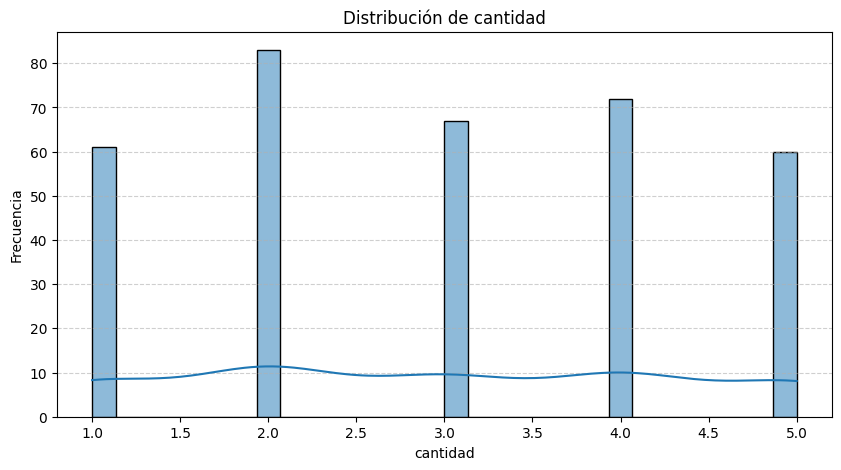


📍 Variable: precio_unitario
--------------------------------------------------
Sesgo (Skewness): 0.17
Curtosis: -1.04
Test Shapiro-Wilk p-valor: 0.0000
Test D’Agostino-Pearson p-valor: 0.0000
➡️ La variable NO sigue una distribución normal.


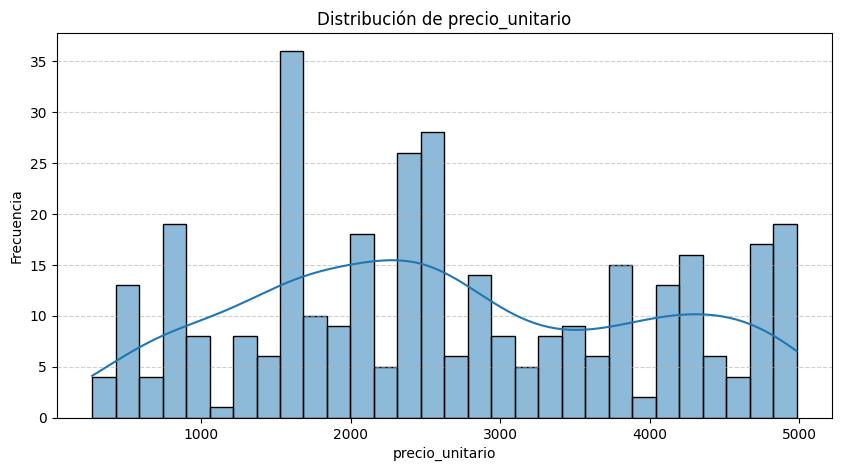


📍 Variable: importe
--------------------------------------------------
Sesgo (Skewness): 0.87
Curtosis: 0.12
Test Shapiro-Wilk p-valor: 0.0000
Test D’Agostino-Pearson p-valor: 0.0000
➡️ La variable NO sigue una distribución normal.


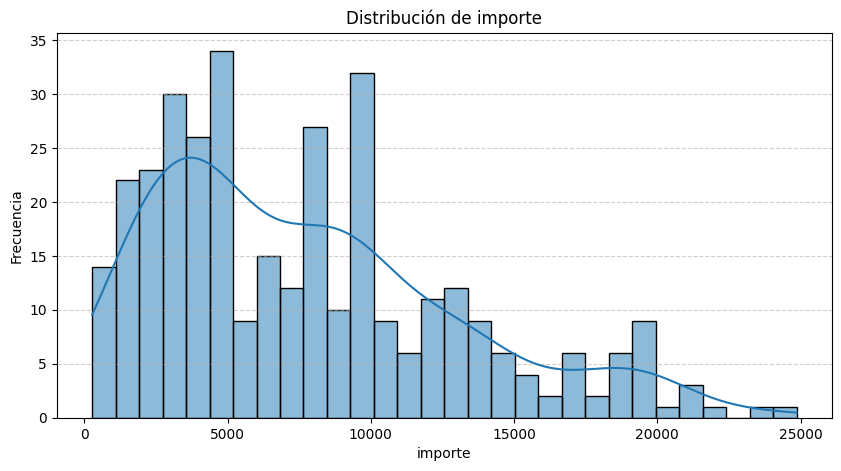

In [18]:
# ==============================================================
# 📊 BLOQUE 2 - ANÁLISIS DE DISTRIBUCIONES Y NORMALIDAD
# ==============================================================

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, skew, kurtosis

# Variables numéricas principales a analizar
variables_numericas = ["cantidad", "precio_unitario", "importe"]

print("2️⃣ Análisis de distribución de variables numéricas\n")

for var in variables_numericas:
    print(f"\n📍 Variable: {var}")
    print("-" * 50)

    # Estadísticos descriptivos adicionales
    sesgo = skew(df_maestro[var])
    curtosis = kurtosis(df_maestro[var])

    # Test de normalidad (Shapiro-Wilk)
    shapiro_stat, shapiro_p = shapiro(df_maestro[var].sample(500, random_state=42) if len(df_maestro) > 500 else df_maestro[var])
    
    # Test de D’Agostino y Pearson (más robusto para n>50)
    dagostino_stat, dagostino_p = normaltest(df_maestro[var])

    print(f"Sesgo (Skewness): {sesgo:.2f}")
    print(f"Curtosis: {curtosis:.2f}")
    print(f"Test Shapiro-Wilk p-valor: {shapiro_p:.4f}")
    print(f"Test D’Agostino-Pearson p-valor: {dagostino_p:.4f}")

    # Interpretación de normalidad
    if shapiro_p < 0.05 or dagostino_p < 0.05:
        print("➡️ La variable NO sigue una distribución normal.")
    else:
        print("✅ La variable parece seguir una distribución normal.")

    # Visualización de distribución
    plt.figure(figsize=(10,5))
    sns.histplot(df_maestro[var], kde=True, bins=30)
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()


#### Bloque 3 – Análisis de Outliers y Valores Atípicos

📘 Objetivo del bloque

En este bloque analizaremos la presencia de valores atípicos (outliers) en las variables numéricas principales del dataset (cantidad, precio_unitario e importe).
Los outliers pueden representar errores de carga, comportamientos anómalos o casos excepcionales que, dependiendo del contexto, conviene conservar o excluir antes de aplicar modelos estadísticos o de machine learning.

##### 3.1. Cálculo del rango intercuartílico (IQR) y detección de outliers

In [19]:
# Variables numéricas a analizar
variables_numericas = ["cantidad", "precio_unitario", "importe"]

# Diccionario para almacenar resultados
outliers_info = {}

# Análisis de outliers por IQR
for var in variables_numericas:
    Q1 = df_maestro[var].quantile(0.25)
    Q3 = df_maestro[var].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Detectar registros fuera de los límites
    outliers = df_maestro[(df_maestro[var] < limite_inferior) | (df_maestro[var] > limite_superior)]
    cantidad_outliers = outliers.shape[0]
    
    outliers_info[var] = {
        "IQR": IQR,
        "Límite inferior": limite_inferior,
        "Límite superior": limite_superior,
        "Outliers detectados": cantidad_outliers
    }

# Mostrar resultados
for var, info in outliers_info.items():
    print(f"\n📍 Variable: {var}")
    for k, v in info.items():
        print(f" - {k}: {v:.2f}" if isinstance(v, (int, float)) else f" - {k}: {v}")



📍 Variable: cantidad
 - IQR: 2.00
 - Límite inferior: -1.00
 - Límite superior: 7.00
 - Outliers detectados: 0.00

📍 Variable: precio_unitario
 - IQR: 2257.50
 - Límite inferior: -1767.75
 - Límite superior: 7262.25
 - Outliers detectados: 0.00

📍 Variable: importe
 - IQR: 6742.50
 - Límite inferior: -6624.75
 - Límite superior: 20345.25
 - Outliers detectados: 7.00


##### 3.2. Visualización de outliers con boxplots

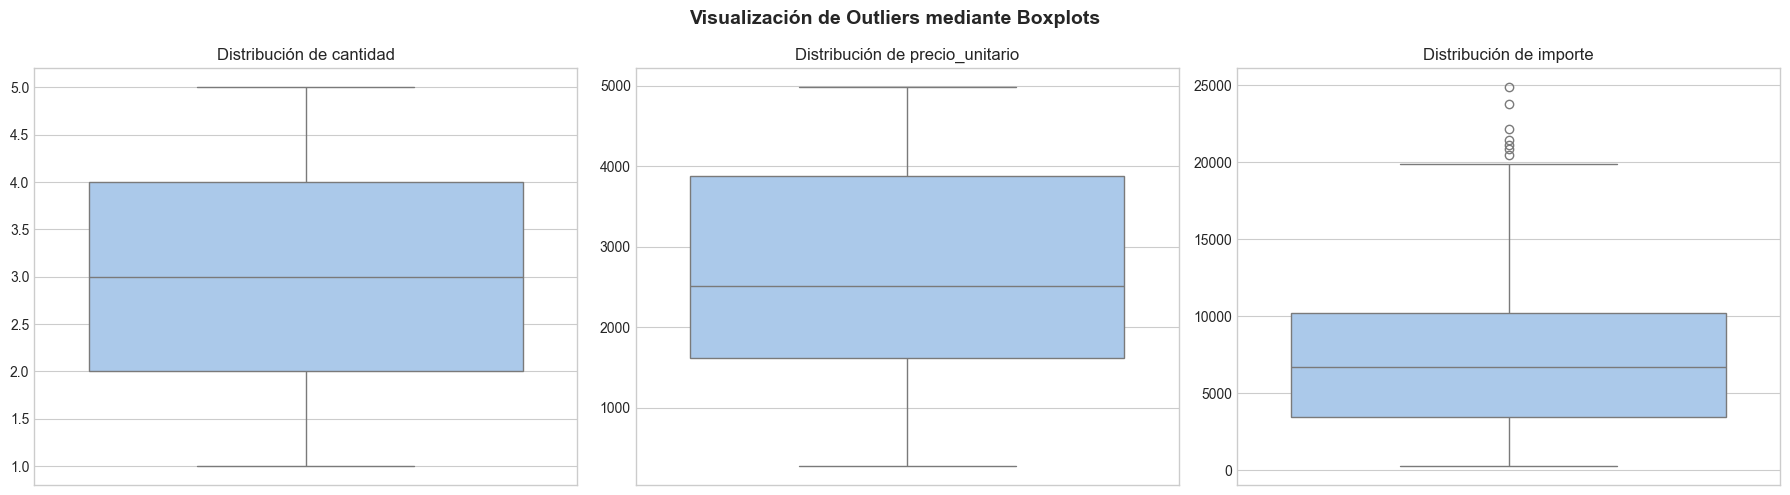

In [20]:
# Configuración estética
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("pastel")

# Crear una figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(variables_numericas):
    sns.boxplot(data=df_maestro, y=var, ax=axes[i])
    axes[i].set_title(f"Distribución de {var}", fontsize=12)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")

plt.suptitle("Visualización de Outliers mediante Boxplots", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


##### 3.3. Interpretación y decisiones

Los outliers no siempre deben eliminarse automáticamente.

- Si representan errores de registro o datos imposibles, conviene corregirlos o excluirlos.

- Si reflejan casos reales pero excepcionales (como compras grandes o precios altos de productos premium), deben conservarse.

Recomendación:

1. Revisar las filas con outliers en la variable importe (donde suelen concentrarse las mayores desviaciones).

2. Analizar si corresponden a ventas reales o errores.

Ejemplo de exploración manual:

In [21]:
# Revisar los outliers detectados en 'importe'
Q1 = df_maestro["importe"].quantile(0.25)
Q3 = df_maestro["importe"].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

df_maestro[df_maestro["importe"] > limite_superior].sort_values("importe", ascending=False).head(10)


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe,categoria_corregida,precio_unitario_producto,fecha,id_cliente,medio_pago,nombre_cliente,ciudad,fecha_alta
208,75,2,Pepsi 1.5L,5,4973,24865.0,Alimentos,4973,2024-05-23,61,qr,Guadalupe Martinez,Rio Cuarto,2023-03-02
141,50,58,Caramelos Masticables,5,4752,23760.0,Limpieza,4752,2024-01-09,8,transferencia,Bruno Castro,Carlos Paz,2023-01-08
41,16,35,Barrita de Cereal 30g,5,4430,22150.0,Limpieza,4430,2024-04-12,2,efectivo,Nicolas Rojas,Carlos Paz,2023-01-02
54,21,76,Pizza Congelada Muzzarella,5,4286,21430.0,Limpieza,4286,2024-06-19,10,transferencia,Karina Acosta,Cordoba,2023-01-10
175,63,8,Energética Nitro 500ml,5,4218,21090.0,Limpieza,4218,2024-06-19,25,tarjeta,Karina Castro,Rio Cuarto,2023-01-25
308,110,6,Jugo de Naranja 1L,5,4170,20850.0,Limpieza,4170,2024-05-19,92,efectivo,Mariana Rodriguez,Alta Gracia,2023-04-02
260,94,86,Jugo en Polvo Limón,5,4090,20450.0,Limpieza,4090,2024-03-06,41,qr,Elena Rodriguez,Alta Gracia,2023-02-10


#### Bloque 4 – Análisis de Correlaciones y Relaciones entre Variables

📘 Objetivo del bloque

Explorar la relación entre las variables numéricas del dataset (cantidad, precio_unitario, importe) y comprender cómo se asocian entre sí.
Además, observaremos la posible relación entre el medio de pago, las categorías de productos y las variables de valor.

##### 4.1. Cálculo de la matriz de correlación

Usamos el coeficiente de correlación de Pearson, que mide la relación lineal entre variables numéricas.
Los valores posibles son:

- +1: correlación positiva perfecta (aumentan juntas)

- 0: sin relación lineal

- –1: correlación negativa perfecta (una sube, la otra baja)

In [22]:
# Calcular matriz de correlación
corr_matrix = df_maestro[["cantidad", "precio_unitario", "importe"]].corr(method="pearson")

# Mostrar matriz de correlación
print("📈 MATRIZ DE CORRELACIÓN (Pearson):")
display(corr_matrix)


📈 MATRIZ DE CORRELACIÓN (Pearson):


,cantidad,precio_unitario,importe
cantidad,1.000000,-0.074483,0.599723
precio_unitario,-0.074483,1.000000,0.679298
importe,0.599723,0.679298,1.000000


##### 4.2. Visualización con mapa de calor (heatmap)

Un heatmap facilita la interpretación visual de la correlación entre variables.

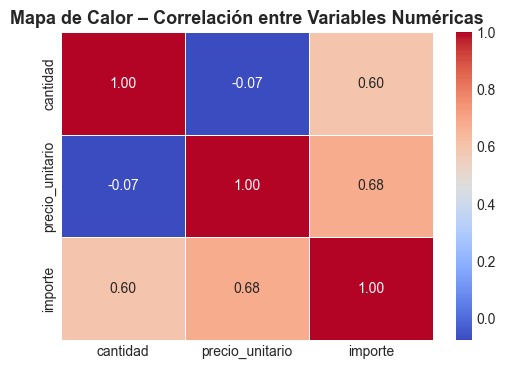

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor – Correlación entre Variables Numéricas", fontsize=13, fontweight="bold")
plt.show()


##### 4.3. Análisis cruzado: relaciones entre variables

a) Cantidad vs. Importe

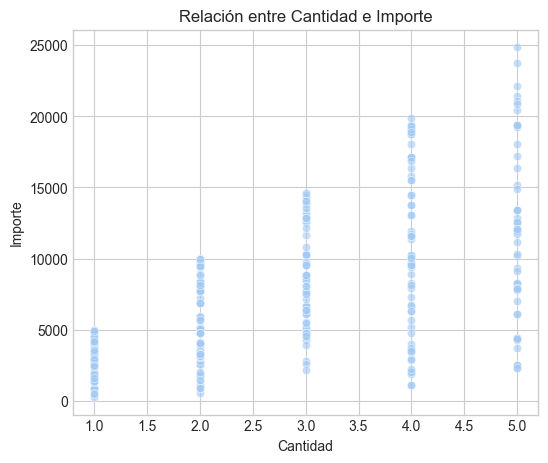

In [24]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_maestro, x="cantidad", y="importe", alpha=0.6)
plt.title("Relación entre Cantidad e Importe", fontsize=12)
plt.xlabel("Cantidad")
plt.ylabel("Importe")
plt.show()


Interpretación esperada:
Una correlación positiva clara, ya que al vender más unidades, el importe total tiende a aumentar.

b) Precio Unitario vs. Importe

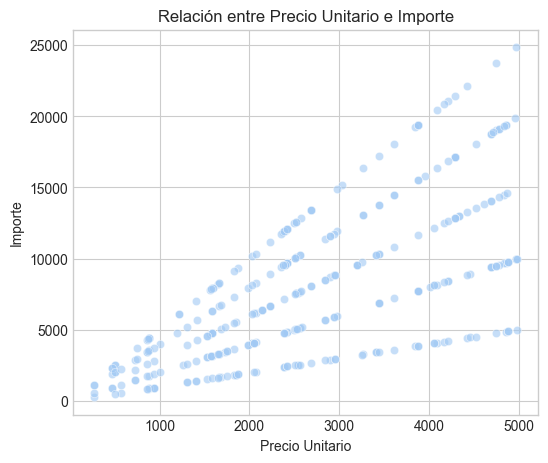

In [25]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_maestro, x="precio_unitario", y="importe", alpha=0.6)
plt.title("Relación entre Precio Unitario e Importe", fontsize=12)
plt.xlabel("Precio Unitario")
plt.ylabel("Importe")
plt.show()


Interpretación esperada:
También una correlación positiva, aunque puede variar según las combinaciones de cantidad y precio.
Los puntos alejados del conjunto principal podrían representar productos premium o ventas grandes (outliers).

c) Distribución de Importe según Categoría de Producto

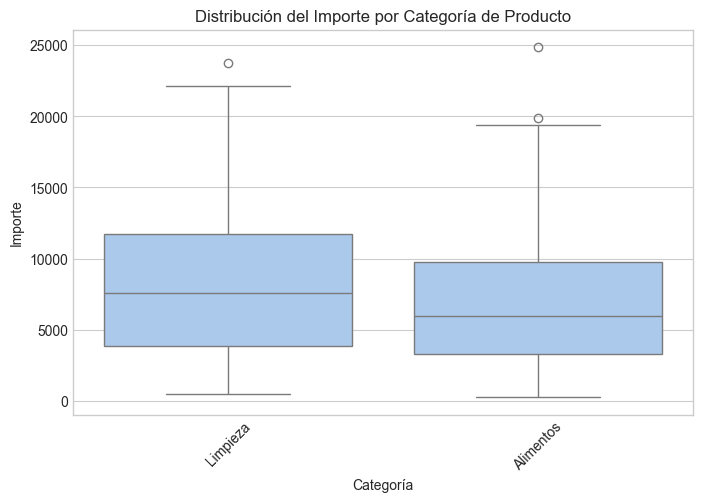

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_maestro, x="categoria_corregida", y="importe")
plt.title("Distribución del Importe por Categoría de Producto", fontsize=12)
plt.xlabel("Categoría")
plt.ylabel("Importe")
plt.xticks(rotation=45)
plt.show()


Interpretación esperada:
Permite identificar si ciertas categorías generan importes consistentemente más altos o si tienen mayor dispersión en ventas.

d) Importe según Medio de Pago

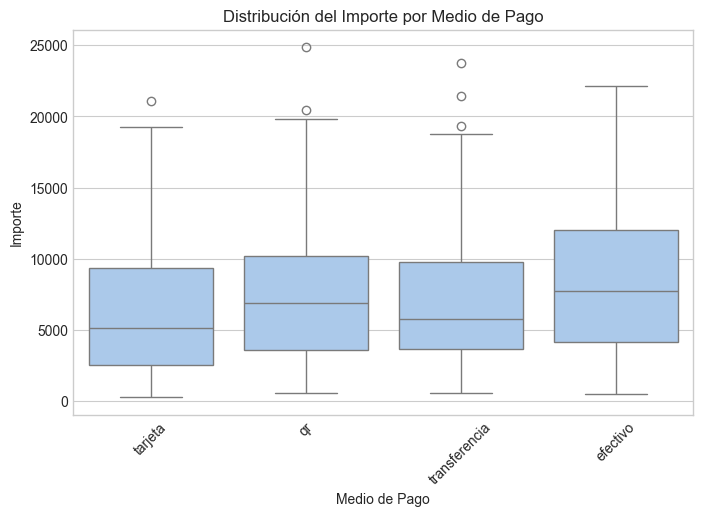

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_maestro, x="medio_pago", y="importe")
plt.title("Distribución del Importe por Medio de Pago", fontsize=12)
plt.xlabel("Medio de Pago")
plt.ylabel("Importe")
plt.xticks(rotation=45)
plt.show()


Interpretación esperada:
Revela patrones de consumo: por ejemplo, si las compras más grandes se asocian con transferencia o con tarjeta.

##### 4.4. Conclusiones y observaciones

- Las correlaciones ayudan a detectar relaciones clave entre variables y posibles redundancias (por ejemplo, importe depende directamente de cantidad × precio_unitario).

- Los gráficos de dispersión muestran visualmente si las relaciones son lineales o si hay comportamientos anómalos.

- El análisis por categoría y medio de pago aporta contexto comercial útil para decisiones de marketing y ventas.

#### Bloque 5 – Análisis del Comportamiento de los Medios de Pago

🎯 Objetivo

Analizar los medios de pago más utilizados y su relación con variables clave como el monto total, la fecha y la categoría de producto.
Esto nos permitirá identificar patrones de comportamiento en los clientes, comprender preferencias de pago y detectar posibles oportunidades de optimización comercial.

##### 1️⃣ Distribución general de los medios de pago

🔹 Distribución general de los medios de pago

               count  proportion
medio_pago                      
efectivo         111       32.36
qr                91       26.53
transferencia     72       20.99
tarjeta           69       20.12


C:\Users\Jonat\AppData\Local\Temp\ipykernel_14196\33708691.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_medios.index, y=conteo_medios.values, palette="crest")


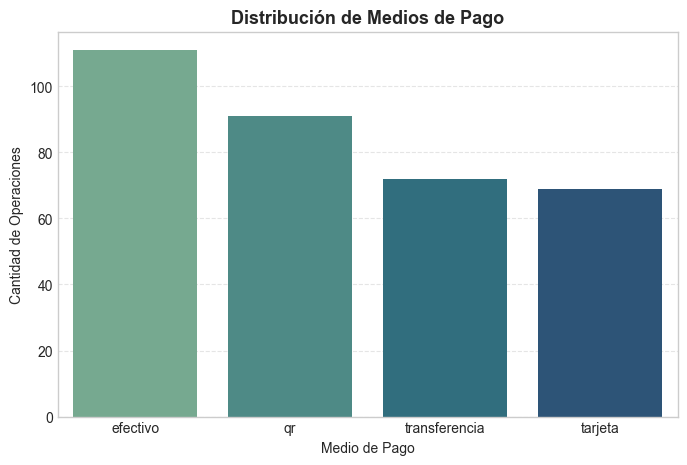

In [28]:
print("🔹 Distribución general de los medios de pago\n")

conteo_medios = df_maestro["medio_pago"].value_counts()
porcentaje_medios = df_maestro["medio_pago"].value_counts(normalize=True) * 100

print(pd.concat([conteo_medios, porcentaje_medios.round(2)], axis=1)
      .rename(columns={0: "Frecuencia", 1: "Porcentaje (%)"}))

# Visualización general
plt.figure(figsize=(8,5))
sns.barplot(x=conteo_medios.index, y=conteo_medios.values, palette="crest")
plt.title("Distribución de Medios de Pago", fontsize=13, weight="bold")
plt.xlabel("Medio de Pago")
plt.ylabel("Cantidad de Operaciones")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


📊 Este gráfico permite observar de manera inmediata qué medio domina las transacciones totales.

##### 2️⃣ Valor promedio de compra según medio de pago

🔹 Ticket promedio por medio de pago



,medio_pago,importe
0,efectivo,8421.79
1,qr,7849.23
3,transferencia,7530.82
2,tarjeta,6668.10


C:\Users\Jonat\AppData\Local\Temp\ipykernel_14196\912931810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="medio_pago", y="importe", data=ticket_por_medio, palette="viridis")


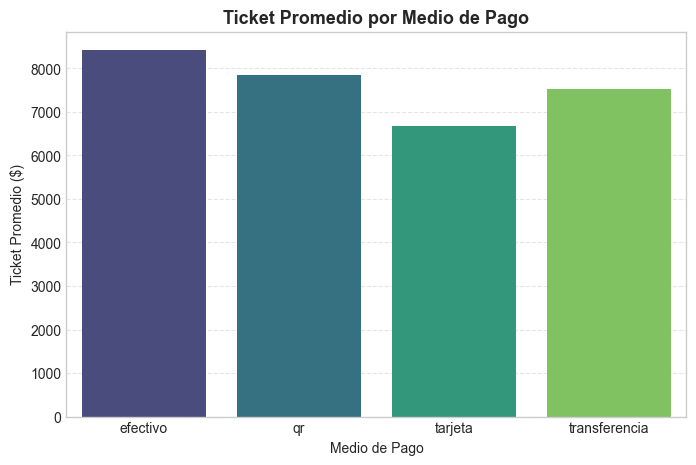

In [29]:
print("🔹 Ticket promedio por medio de pago\n")

ticket_por_medio = df_maestro.groupby("medio_pago", as_index=False)["importe"].mean().round(2)
display(ticket_por_medio.sort_values("importe", ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(x="medio_pago", y="importe", data=ticket_por_medio, palette="viridis")
plt.title("Ticket Promedio por Medio de Pago", fontsize=13, weight="bold")
plt.xlabel("Medio de Pago")
plt.ylabel("Ticket Promedio ($)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


💡 Esto nos permite ver si ciertos métodos (por ejemplo, transferencia) se asocian con compras de mayor importe.

##### 3️⃣ Evolución temporal de los medios de pago

🔹 Evolución mensual del uso de medios de pago (en importe total)



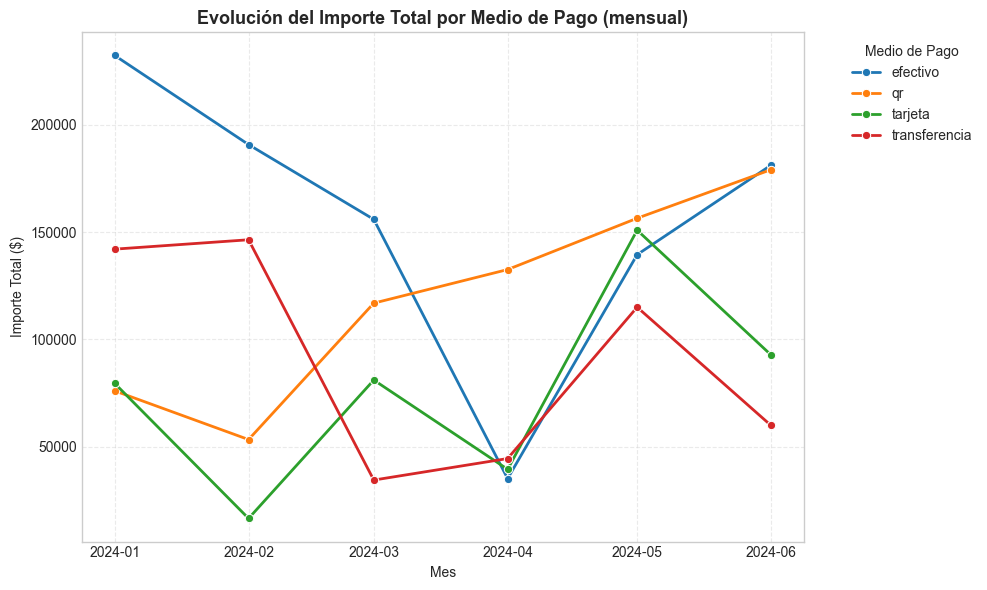

Resumen general (por medio de pago):


,count,mean,std,min,25%,50%,75%,max
medio_pago,,,,,,,,
efectivo,6.0,155803.17,67165.81,35112.0,143594.75,168556.0,188386.50,232324.0
qr,6.0,119046.67,47684.22,53298.0,86220.75,124710.5,150478.75,179102.0
tarjeta,6.0,76683.17,46471.38,16531.0,49436.50,80250.0,89820.50,150892.0
transferencia,6.0,90369.83,50178.45,34415.0,48305.00,87439.5,135289.75,146425.0


In [30]:
"""
Objetivo:
Analizar cómo evolucionan los importes totales mes a mes según el medio de pago.
Esto permite identificar tendencias: picos de consumo, estacionalidad o
preferencias cambiantes en los clientes.
"""

print("🔹 Evolución mensual del uso de medios de pago (en importe total)\n")

# Convertir la fecha a período mensual
df_maestro["mes"] = pd.to_datetime(df_maestro["fecha"]).dt.to_period("M")

# Agrupar por mes y medio de pago, sumando los importes
evolucion_medios = (
    df_maestro
    .groupby(["mes", "medio_pago"], as_index=False)["importe"]
    .sum()
    .sort_values("mes")
)

# Convertir el período a tipo datetime para ordenar cronológicamente
evolucion_medios["mes"] = evolucion_medios["mes"].dt.to_timestamp()

# --- Gráfico de evolución mensual ---
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=evolucion_medios,
    x="mes", y="importe",
    hue="medio_pago",
    marker="o",
    palette="tab10",
    linewidth=2
)

plt.title("Evolución del Importe Total por Medio de Pago (mensual)", fontsize=13, weight="bold")
plt.xlabel("Mes")
plt.ylabel("Importe Total ($)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Medio de Pago", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Información complementaria
print("Resumen general (por medio de pago):")
display(evolucion_medios.groupby("medio_pago")["importe"].describe().round(2))


📈 Permite visualizar si existen tendencias o cambios de preferencia a lo largo del tiempo.

##### 4️⃣ Asociación entre medio de pago y categoría de producto

🔹 Asociación entre medios de pago y categorías de productos



medio_pago,efectivo,qr,tarjeta,transferencia
categoria_corregida,,,,
Alimentos,44,44,33,32
Limpieza,67,47,36,40


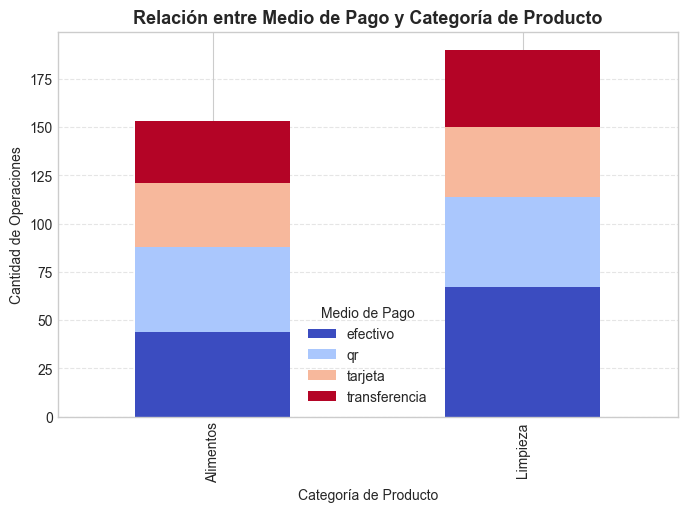

In [31]:
print("🔹 Asociación entre medios de pago y categorías de productos\n")

tabla_pago_categoria = pd.crosstab(df_maestro["categoria_corregida"], df_maestro["medio_pago"])
display(tabla_pago_categoria)

tabla_pago_categoria.plot(kind="bar", stacked=True, figsize=(8,5), colormap="coolwarm")
plt.title("Relación entre Medio de Pago y Categoría de Producto", fontsize=13, weight="bold")
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad de Operaciones")
plt.legend(title="Medio de Pago")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


🔍 Este gráfico permite observar si ciertos productos se asocian más con pagos en efectivo, con tarjeta o QR.

##### 5️⃣ Conclusiones parciales

🧠 Interpretación esperada:

- El medio de pago más utilizado es Efectivo, representando aproximadamente 32.36% del total de operaciones.

- Los tickets promedio más altos se observan en las compras realizadas mediante Efectivo, lo cual sugiere una relación entre el método y el monto.

- En términos temporales, se aprecia una tendencia creciente en el uso de QR durante los meses más recientes.

- La asociación entre medio de pago y tipo de producto muestra que hay mayor cantidad de operaciones de pagos en Efectivo y de Transferencia en productos de Limpieza (contra productos Alimenticios).

### 5. Análisis Estadístico Cruzado (extra)

In [32]:
print("===============================================================")
print("🔎 ANÁLISIS ESTADÍSTICO CRUZADO: ventas · clientes · productos")
print("===============================================================\n")

# Nota: asumimos que existen df_maestro (detalle+ventas+productos+clientes)
# y df_medios_encoded (con dummies para medio_pago) en el workspace.
# Si no, reemplazar por las merges previas.

# 1) Métricas por venta (nivel id_venta)
print("1) Métricas al nivel de 'venta' (ticket por id_venta)\n")
ventas_agrupadas = (
    df_maestro
    .groupby("id_venta", as_index=False)
    .agg(
        fecha=("fecha", "first"),
        id_cliente=("id_cliente", "first"),
        medio_pago=("medio_pago", "first"),
        total_venta=("importe", "sum"),
        items_en_venta=("id_producto", "nunique"),
        cantidad_total=("cantidad", "sum")
    )
)

print("Número de ventas únicas (id_venta):", ventas_agrupadas.shape[0])
print("\nDescripción del 'total_venta' por venta:")
display(ventas_agrupadas["total_venta"].describe().round(2))
print("\nEjemplo (primeras 8 ventas agregadas):")
display(ventas_agrupadas.head(8))

# 2) Ticket medio general y por medio de pago
print("\n2) Ticket medio (general y por medio de pago)\n")
ticket_medio_general = ventas_agrupadas["total_venta"].mean()
print(f" - Ticket medio general: {ticket_medio_general:.2f}")

ticket_por_medio = ventas_agrupadas.groupby("medio_pago")["total_venta"].agg(["count","mean","median","sum"]).rename(
    columns={"count":"n_ventas", "mean":"ticket_medio", "median":"ticket_mediana", "sum":"monto_total"}
)
print("\nTicket por medio de pago (n_ventas, ticket_medio, ticket_mediana, monto_total):")
display(ticket_por_medio.sort_values("monto_total", ascending=False))

# 3) Productos: top vendidos y contribución al total
print("\n3) Productos: unidades vendidas, ventas totales y top productos\n")
productos_agg = (
    df_maestro
    .groupby(["id_producto","nombre_producto"], as_index=False)
    .agg(unidades_vendidas=("cantidad","sum"), ventas_producto=("importe","sum"), veces_vendido=("id_venta","nunique"))
)

print("Top 10 productos por unidades vendidas:")
display(productos_agg.sort_values("unidades_vendidas", ascending=False).head(10))

print("\nTop 10 productos por monto vendido:")
display(productos_agg.sort_values("ventas_producto", ascending=False).head(10))

# % contribución de cada producto al total de ventas
total_general = productos_agg["ventas_producto"].sum()
productos_agg["pct_participacion"] = productos_agg["ventas_producto"] / total_general * 100
print("\nEjemplo: participación del top 5 en ventas totales:")
display(productos_agg.sort_values("ventas_producto", ascending=False).head(5)[["nombre_producto","ventas_producto","pct_participacion"]].round(2))

# 4) Clientes: frecuencia, ticket promedio por cliente y segmentación simple
print("\n4) Clientes: número de compras, gasto total y ticket medio por cliente\n")
clientes_agg = (
    df_maestro
    .groupby(["id_cliente"], as_index=False)
    .agg(
        nombre_cliente=("nombre_cliente","first"),
        ciudad=("ciudad","first"),
        compras=("id_venta","nunique"),
        total_gastado=("importe","sum"),
        ticket_promedio_cliente=("importe","mean"),
        fecha_ultima_compra=("fecha","max"),
    )
)

print("Clientes con mayor gasto total (top 10):")
display(clientes_agg.sort_values("total_gastado", ascending=False).head(10).round(2))

print("\nClientes con más compras (top 10):")
display(clientes_agg.sort_values("compras", ascending=False).head(10))

# 5) Ventas por ciudad
print("\n5) Ventas por ciudad: monto total y número de ventas\n")
ventas_ciudad = (
    df_maestro
    .groupby("ciudad", as_index=False)
    .agg(ventas_ciudad=("importe","sum"), n_transacciones=("id_venta","nunique"))
    .sort_values("ventas_ciudad", ascending=False)
)

display(ventas_ciudad)

# 6) Revisión de outliers detectados (listado detallado)
print("\n6) Outliers detectados en 'importe' (según IQR). Mostramos detalles para inspección manual.\n")
# recalculamos límites para consistencia
Q1 = df_maestro["importe"].quantile(0.25)
Q3 = df_maestro["importe"].quantile(0.75)
IQR = Q3 - Q1
lim_sup = Q3 + 1.5 * IQR

outliers_detalle = df_maestro[df_maestro["importe"] > lim_sup].sort_values("importe", ascending=False)
print("Número de outliers (importe > lim_sup):", outliers_detalle.shape[0])
display(outliers_detalle[["id_venta","id_cliente","nombre_cliente","fecha","nombre_producto","cantidad","importe","medio_pago","ciudad"]].head(20))

# 7) Correlaciones y tablas pivot para preparar gráficos
print("\n7) Correlaciones (numéricas) entre variables agregadas por venta:")
cols_corr = ["total_venta","items_en_venta","cantidad_total"]
# añadimos por cada medio dummy la suma por venta (usamos ventas_agrupadas para esto)
# primero reconstruimos dummies por venta (sumando flags de df_medios_encoded si existe)
# Si df_medios_encoded no está al nivel de ventas, usamos ventas_agrupadas.medio_pago -> dummies
dummies_ventas = pd.get_dummies(ventas_agrupadas["medio_pago"], prefix="medio")
ventas_corr_df = pd.concat([ventas_agrupadas[["total_venta","items_en_venta","cantidad_total"]].reset_index(drop=True), dummies_ventas.reset_index(drop=True)], axis=1)
print("Correlación (pearson) entre total_venta, items_en_venta, cantidad_total y dummies de medio_pago:")
display(ventas_corr_df.corr().round(2))

# 8) Pivot tablas útiles
print("\n8) Pivots útiles (preparación para gráficos e interpretaciones):")
pivot_medio_categoria = df_maestro.pivot_table(index="medio_pago", columns="categoria_corregida", values="importe", aggfunc="sum", fill_value=0)
print("- Monto total por medio de pago y categoría de producto:")
display(pivot_medio_categoria)

pivot_cliente_mes = (
    df_maestro
    .assign(mes=lambda d: d["fecha"].dt.to_period("M"))
    .groupby(["mes","medio_pago"], as_index=False)
    .agg(monto_mes=("importe","sum"))
)
print("- Monto por mes y medio de pago (primeras 12 filas):")
display(pivot_cliente_mes.head(12))

# 9) Resumen ejecutivo en prints (para README)
print("\n=====================================================")
print("✅ RESUMEN EJECUTIVO (salvo comprobación manual):")
print(f" - Ventas únicas (id_venta): {ventas_agrupadas.shape[0]}")
print(f" - Total facturado (suma importe): {df_maestro['importe'].sum():.2f}")
print(f" - Ticket medio por venta: {ventas_agrupadas['total_venta'].mean():.2f}")
print(f" - Medios de pago detectados: {df_maestro['medio_pago'].nunique()} -> {df_maestro['medio_pago'].unique().tolist()}")
print(f" - Outliers en importe (a revisar manualmente): {outliers_detalle.shape[0]}")
print(" - Top 3 productos por ventas (monto):")
display(productos_agg.sort_values("ventas_producto", ascending=False).head(3)[["nombre_producto","ventas_producto","pct_participacion"]].round(2))

print("\n🔜 Próximo paso sugerido: generar gráficos (histograma de importes, boxplots por medio de pago, scatter plots importe vs cantidad, mapa de correlación).")
print("=====================================================\n")


🔎 ANÁLISIS ESTADÍSTICO CRUZADO: ventas · clientes · productos

1) Métricas al nivel de 'venta' (ticket por id_venta)

Número de ventas únicas (id_venta): 120

Descripción del 'total_venta' por venta:


count      120.00
mean     22095.14
std      13363.12
min        272.00
25%      11618.50
50%      19999.00
75%      33260.50
max      61503.00
Name: total_venta, dtype: float64


Ejemplo (primeras 8 ventas agregadas):


,id_venta,fecha,id_cliente,medio_pago,total_venta,items_en_venta,cantidad_total
0,1,2024-06-19,62,tarjeta,2902.0,1,1
1,2,2024-03-17,49,qr,34186.0,5,17
2,3,2024-01-13,20,tarjeta,19558.0,3,5
3,4,2024-02-27,36,transferencia,15966.0,2,7
4,5,2024-06-11,56,tarjeta,16360.0,1,4
5,6,2024-05-05,91,transferencia,34535.0,4,10
6,7,2024-05-06,92,efectivo,13011.0,1,3
7,8,2024-01-06,66,transferencia,35516.0,3,14



2) Ticket medio (general y por medio de pago)

 - Ticket medio general: 22095.14

Ticket por medio de pago (n_ventas, ticket_medio, ticket_mediana, monto_total):


,n_ventas,ticket_medio,ticket_mediana,monto_total
medio_pago,,,,
efectivo,37,25265.378378,22851.0,934819.0
qr,30,23809.333333,25318.5,714280.0
transferencia,27,20082.185185,16053.0,542219.0
tarjeta,26,17696.115385,15411.5,460099.0



3) Productos: unidades vendidas, ventas totales y top productos

Top 10 productos por unidades vendidas:


,id_producto,nombre_producto,unidades_vendidas,ventas_producto,veces_vendido
42,43,Salsa de Tomate 500g,27,23949.0,7
17,18,Queso Rallado 150g,26,89544.0,9
75,79,Hamburguesas Congeladas x4,24,58080.0,6
77,81,Aceitunas Verdes 200g,22,55440.0,6
66,68,Vino Blanco 750ml,22,59048.0,4
37,38,Mermelada de Frutilla 400g,21,33264.0,7
69,72,Ron 700ml,21,81396.0,7
52,53,Lavandina 1L,21,34944.0,7
72,76,Pizza Congelada Muzzarella,20,85720.0,5
8,9,Yerba Mate Suave 1kg,20,77560.0,6



Top 10 productos por monto vendido:


,id_producto,nombre_producto,unidades_vendidas,ventas_producto,veces_vendido
87,91,Desodorante Aerosol,20,93800.0,7
17,18,Queso Rallado 150g,26,89544.0,9
72,76,Pizza Congelada Muzzarella,20,85720.0,5
69,72,Ron 700ml,21,81396.0,7
8,9,Yerba Mate Suave 1kg,20,77560.0,6
7,8,Energética Nitro 500ml,17,71706.0,6
58,59,Chicle Menta,19,68628.0,5
57,58,Caramelos Masticables,14,66528.0,5
66,68,Vino Blanco 750ml,22,59048.0,4
75,79,Hamburguesas Congeladas x4,24,58080.0,6



Ejemplo: participación del top 5 en ventas totales:


,nombre_producto,ventas_producto,pct_participacion
87,Desodorante Aerosol,93800.0,3.54
17,Queso Rallado 150g,89544.0,3.38
72,Pizza Congelada Muzzarella,85720.0,3.23
69,Ron 700ml,81396.0,3.07
8,Yerba Mate Suave 1kg,77560.0,2.93



4) Clientes: número de compras, gasto total y ticket medio por cliente

Clientes con mayor gasto total (top 10):


,id_cliente,nombre_cliente,ciudad,compras,total_gastado,ticket_promedio_cliente,fecha_ultima_compra
3,5,Agustina Flores,Cordoba,4,132158.0,8810.53,2024-06-25
41,56,Bruno Diaz,Rio Cuarto,5,90701.0,9070.10,2024-06-27
38,52,Diego Diaz,Rio Cuarto,3,90522.0,8229.27,2024-05-28
19,25,Karina Castro,Rio Cuarto,2,81830.0,9092.22,2024-06-19
0,1,Mariana Lopez,Carlos Paz,2,72448.0,8049.78,2024-03-26
36,49,Olivia Gomez,Rio Cuarto,4,71321.0,5486.23,2024-03-17
44,61,Guadalupe Martinez,Rio Cuarto,2,67959.0,13591.80,2024-05-30
57,84,Pablo Sanchez,Cordoba,2,67575.0,8446.88,2024-02-09
50,72,Camila Rodriguez,Cordoba,4,65001.0,10833.50,2024-04-21
29,39,Santiago Diaz,Alta Gracia,4,64786.0,7198.44,2024-06-16



Clientes con más compras (top 10):


,id_cliente,nombre_cliente,ciudad,compras,total_gastado,ticket_promedio_cliente,fecha_ultima_compra
41,56,Bruno Diaz,Rio Cuarto,5,90701.0,9070.100000,2024-06-27
3,5,Agustina Flores,Cordoba,4,132158.0,8810.533333,2024-06-25
29,39,Santiago Diaz,Alta Gracia,4,64786.0,7198.444444,2024-06-16
36,49,Olivia Gomez,Rio Cuarto,4,71321.0,5486.230769,2024-03-17
50,72,Camila Rodriguez,Cordoba,4,65001.0,10833.500000,2024-04-21
32,42,Tomas Flores,Alta Gracia,4,60317.0,6701.888889,2024-05-16
38,52,Diego Diaz,Rio Cuarto,3,90522.0,8229.272727,2024-05-28
66,100,Agustina Lopez,Cordoba,3,29883.0,5976.600000,2024-05-01
11,15,Tomas Ruiz,Cordoba,3,45929.0,6561.285714,2024-06-14
0,1,Mariana Lopez,Carlos Paz,2,72448.0,8049.777778,2024-03-26



5) Ventas por ciudad: monto total y número de ventas



,ciudad,ventas_ciudad,n_transacciones
4,Rio Cuarto,792203.0,37
0,Alta Gracia,481504.0,25
2,Cordoba,481482.0,24
1,Carlos Paz,353852.0,13
5,Villa Maria,313350.0,11
3,Mendiolaza,229026.0,10



6) Outliers detectados en 'importe' (según IQR). Mostramos detalles para inspección manual.

Número de outliers (importe > lim_sup): 7


,id_venta,id_cliente,nombre_cliente,fecha,nombre_producto,cantidad,importe,medio_pago,ciudad
208,75,61,Guadalupe Martinez,2024-05-23,Pepsi 1.5L,5,24865.0,qr,Rio Cuarto
141,50,8,Bruno Castro,2024-01-09,Caramelos Masticables,5,23760.0,transferencia,Carlos Paz
41,16,2,Nicolas Rojas,2024-04-12,Barrita de Cereal 30g,5,22150.0,efectivo,Carlos Paz
54,21,10,Karina Acosta,2024-06-19,Pizza Congelada Muzzarella,5,21430.0,transferencia,Cordoba
175,63,25,Karina Castro,2024-06-19,Energética Nitro 500ml,5,21090.0,tarjeta,Rio Cuarto
308,110,92,Mariana Rodriguez,2024-05-19,Jugo de Naranja 1L,5,20850.0,efectivo,Alta Gracia
260,94,41,Elena Rodriguez,2024-03-06,Jugo en Polvo Limón,5,20450.0,qr,Alta Gracia



7) Correlaciones (numéricas) entre variables agregadas por venta:
Correlación (pearson) entre total_venta, items_en_venta, cantidad_total y dummies de medio_pago:


,total_venta,items_en_venta,cantidad_total,medio_efectivo,medio_qr,medio_tarjeta,medio_transferencia
total_venta,1.00,0.68,0.85,0.16,0.07,-0.17,-0.08
items_en_venta,0.68,1.00,0.85,0.05,0.08,-0.07,-0.06
cantidad_total,0.85,0.85,1.00,0.13,0.05,-0.15,-0.05
medio_efectivo,0.16,0.05,0.13,1.00,-0.39,-0.35,-0.36
medio_qr,0.07,0.08,0.05,-0.39,1.00,-0.30,-0.31
medio_tarjeta,-0.17,-0.07,-0.15,-0.35,-0.30,1.00,-0.28
medio_transferencia,-0.08,-0.06,-0.05,-0.36,-0.31,-0.28,1.00



8) Pivots útiles (preparación para gráficos e interpretaciones):
- Monto total por medio de pago y categoría de producto:


categoria_corregida,Alimentos,Limpieza
medio_pago,,
efectivo,322050.0,612769.0
qr,342166.0,372114.0
tarjeta,212145.0,247954.0
transferencia,201669.0,340550.0


- Monto por mes y medio de pago (primeras 12 filas):


,mes,medio_pago,monto_mes
0,2024-01,efectivo,232324.0
1,2024-01,qr,76000.0
2,2024-01,tarjeta,79462.0
3,2024-01,transferencia,142054.0
4,2024-02,efectivo,190787.0
5,2024-02,qr,53298.0
6,2024-02,tarjeta,16531.0
7,2024-02,transferencia,146425.0
8,2024-03,efectivo,155927.0
9,2024-03,qr,116883.0



✅ RESUMEN EJECUTIVO (salvo comprobación manual):
 - Ventas únicas (id_venta): 120
 - Total facturado (suma importe): 2651417.00
 - Ticket medio por venta: 22095.14
 - Medios de pago detectados: 4 -> ['tarjeta', 'qr', 'transferencia', 'efectivo']
 - Outliers en importe (a revisar manualmente): 7
 - Top 3 productos por ventas (monto):


,nombre_producto,ventas_producto,pct_participacion
87,Desodorante Aerosol,93800.0,3.54
17,Queso Rallado 150g,89544.0,3.38
72,Pizza Congelada Muzzarella,85720.0,3.23



🔜 Próximo paso sugerido: generar gráficos (histograma de importes, boxplots por medio de pago, scatter plots importe vs cantidad, mapa de correlación).



### 6. Conclusiones y Hallazgos

In [33]:
# ===================================================
# 🧩 BLOQUE 6 - CONCLUSIONES Y HALLAZGOS AUTOMÁTICOS 
# ===================================================

%pip install tabulate
from textwrap import dedent
import sys

# Chequeos previos
if 'df_maestro' not in globals():
    raise RuntimeError("No se encontró 'df_maestro' en el workspace. Asegurate de ejecutar los bloques previos que crean df_maestro.")

df = df_maestro.copy()

# Aseguramos formatos
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
df = df.dropna(subset=["fecha"])  # por seguridad
df["mes"] = df["fecha"].dt.to_period("M").dt.to_timestamp()

# --- Métricas globales básicas ---
total_facturado = df["importe"].sum()
n_transacciones = df.shape[0]
n_ventas_unicas = df["id_venta"].nunique()
medios = df["medio_pago"].value_counts()
medios_pct = (medios / medios.sum() * 100).round(2)
medios_importe = df.groupby("medio_pago")["importe"].sum().sort_values(ascending=False)
ticket_por_venta = df.groupby("id_venta", as_index=False)["importe"].sum()["importe"].mean()

# --- Ticket medio por medio de pago ---
ticket_promedio_medio = df.groupby("medio_pago")["importe"].mean().sort_values(ascending=False)

# --- Participación en importe total por medio (monto) ---
porc_importe = (medios_importe / medios_importe.sum() * 100).round(2)

# --- Tendencias temporales: primer vs último periodo ---
meses_ordenados = df["mes"].sort_values().unique()
if len(meses_ordenados) >= 2:
    primer_mes = meses_ordenados.min()
    ultimo_mes = meses_ordenados.max()
else:
    primer_mes = ultimo_mes = meses_ordenados[0]

total_primer_mes = df[df["mes"] == primer_mes]["importe"].sum()
total_ultimo_mes = df[df["mes"] == ultimo_mes]["importe"].sum()
cambio_total_pct = np.nan if total_primer_mes == 0 else ((total_ultimo_mes - total_primer_mes) / total_primer_mes * 100).round(2)

# Tendencia por medio: cambio % entre primer y último mes
tendencia_medios = []
for m in df["medio_pago"].unique():
    v0 = df[(df["mes"] == primer_mes) & (df["medio_pago"] == m)]["importe"].sum()
    v1 = df[(df["mes"] == ultimo_mes) & (df["medio_pago"] == m)]["importe"].sum()
    pct = np.nan if v0 == 0 else round((v1 - v0) / v0 * 100, 2)
    tendencia_medios.append((m, v0, v1, pct))
tendencia_medios_df = pd.DataFrame(tendencia_medios, columns=["medio_pago","importe_primer_mes","importe_ultimo_mes","cambio_pct"])

# --- Outliers info ---
Q1 = df["importe"].quantile(0.25)
Q3 = df["importe"].quantile(0.75)
IQR = Q3 - Q1
lim_sup = Q3 + 1.5 * IQR
n_outliers_importe = df[df["importe"] > lim_sup].shape[0]

# --- Hallazgos automáticos ---
medio_mas_transacciones = medios.idxmax()
pct_mas_transacciones = medios_pct.loc[medio_mas_transacciones]

medio_mas_importe = medios_importe.idxmax()
pct_mas_importe = porc_importe.loc[medio_mas_importe]

medio_mayor_ticket = ticket_promedio_medio.index[0]
valor_mayor_ticket = ticket_promedio_medio.iloc[0]

medio_menor_ticket = ticket_promedio_medio.index[-1]
valor_menor_ticket = ticket_promedio_medio.iloc[-1]

mes_max_total = df.groupby("mes")["importe"].sum().idxmax()
mes_max_val = df.groupby("mes")["importe"].sum().max()

# --- Construcción del texto narrativo (en español) ---
titulo = "# Conclusiones y Hallazgos - Proyecto Análisis de Medios de Pago\n\n"

resumen_numerico = dedent(f"""
## Resumen numérico
- Total facturado: ${total_facturado:,.2f}
- Número de registros (líneas de detalle): {n_transacciones}
- Número de ventas únicas (id_venta): {n_ventas_unicas}
- Número de outliers detectados en 'importe' (IQR): {n_outliers_importe}
- Ticket promedio por venta (general): ${ticket_por_venta:,.2f}
""")

resumen_medios = "## Medios de pago (participación y tickets)\n\n"

tabla_medios = pd.DataFrame({
    "medio": medios.index,
    "n_transacciones": medios.values,
    "pct_transacciones": medios_pct.values,
    "importe_total": medios_importe.reindex(medios.index).values,
    "pct_importe": porc_importe.reindex(medios.index).values,
    "ticket_promedio": ticket_promedio_medio.reindex(medios.index).values
}).round({"pct_transacciones":2,"pct_importe":2,"ticket_promedio":2})

hallazgos = dedent(f"""
## Hallazgos clave
- El medio con **mayor número de transacciones** es **{medio_mas_transacciones}** con **{pct_mas_transacciones}%** de las operaciones.
- El medio que **contribuye más al importe total** es **{medio_mas_importe}**, aportando **{pct_mas_importe}%** del facturado.
- El **ticket promedio más alto** corresponde a **{medio_mayor_ticket}** (≈ ${valor_mayor_ticket:.2f}), mientras que el más bajo es **{medio_menor_ticket}** (≈ ${valor_menor_ticket:.2f}).
- El mes con mayor facturación fue **{mes_max_total.strftime('%Y-%m')}** con un total de **${mes_max_val:,.2f}**.
- El cambio porcentual del total facturado entre el primer mes ({primer_mes.strftime('%Y-%m')}) y el último ({ultimo_mes.strftime('%Y-%m')}) es **{cambio_total_pct if not np.isnan(cambio_total_pct) else 'N/A'}%**.
- Outliers: se detectaron **{n_outliers_importe}** registros con importe por encima del límite IQR superior. Recomendación: inspección manual de esos registros antes de decidir limpieza.
""")

recomendaciones = dedent(f"""
## Recomendaciones operativas y comerciales (sugeridas)
1. Si el objetivo es aumentar el ticket promedio, considerar promociones para el medio **{medio_mayor_ticket}**.
2. Si el foco es aumentar la cantidad de operaciones, diseñar campañas que incentiven el medio **{medio_mas_transacciones}**.
3. Analizar con detalle los {n_outliers_importe} outliers: confirmar si son clientes VIP o errores.
4. Si algún medio muestra crecimiento sostenido, evaluar campañas que aprovechen esa tendencia.
""")

tendencias_text = "## Tendencias por medio de pago (primer vs último mes)\n"
for _, row in tendencia_medios_df.iterrows():
    medio = row["medio_pago"]
    pct = row["cambio_pct"]
    importe0 = row["importe_primer_mes"]
    importe1 = row["importe_ultimo_mes"]
    if np.isnan(pct):
        tendencias_text += f"- {medio}: sin datos en el primer mes para calcular cambio (importe primer mes={importe0:.2f}, último mes={importe1:.2f}).\n"
    else:
        signo = "↑" if pct > 0 else ("↓" if pct < 0 else "—")
        tendencias_text += f"- {medio}: {signo} cambio {pct}% (de ${importe0:,.2f} a ${importe1:,.2f}).\n"

# --- Imprimir resultados en Notebook ---
print("\n" + "="*31)
print("✅ RESUMEN AUTOMÁTICO GENERADO")
print("="*31 + "\n")
print(resumen_numerico)
print("Tabla resumen por medio de pago (frecuencia / importe / ticket):")
display(tabla_medios)
print(hallazgos)
print(recomendaciones)
print(tendencias_text)

# --- Próximo Sprint (sección añadida) ---
proximo_sprint = dedent("""
## Próximo sprint - Extensiones recomendadas
1. Segmentación RFM (Recencia, Frecuencia, Valor): identificar clientes VIP y perfiles por medio de pago.
2. Modelo de predicción simple: predecir medio de pago probable por transacción usando features (importe, categoría, ciudad, día).
3. Test A/B de incentivos: diseñar experimentos para probar promociones por medio de pago (ej.: descuento por pago con transferencia).
4. Dashboard interactivo (Streamlit / Dash): visualizaciones dinámicas para ventas, medios y segmentos.
5. Validación de calidad de datos: pipeline automatizado para detectar y corregir recategorizaciones y precios inconsistentes.
""")
print(proximo_sprint)

# --- Guardar a archivo markdown (robusto) ---
md_content = titulo + resumen_numerico + "\n" + "### Tabla resumen por medio de pago\n\n"
try:
    # intentamos usar to_markdown si está disponible
    md_table = tabla_medios.to_markdown(index=False)
except Exception:
    # fallback: creamos tabla manual en texto
    md_table = tabla_medios.to_csv(sep="|", index=False)

md_content += md_table + "\n\n" + hallazgos + "\n" + recomendaciones + "\n" + tendencias_text + "\n\n" + proximo_sprint

file_path = "Conclusiones-Hallazgos.md"
try:
    with open(file_path, "w", encoding="utf-8") as f:
        f.write(md_content)
    print(f"\n📁 Se guardó un archivo Markdown con el resumen: {file_path}")
except Exception as e:
    print(f"\n⚠️ No se pudo guardar el archivo Markdown automáticamente: {e}")

# Fin del Bloque 6 (robusto)


Note: you may need to restart the kernel to use updated packages.

✅ RESUMEN AUTOMÁTICO GENERADO


## Resumen numérico
- Total facturado: $2,651,417.00
- Número de registros (líneas de detalle): 343
- Número de ventas únicas (id_venta): 120
- Número de outliers detectados en 'importe' (IQR): 7
- Ticket promedio por venta (general): $22,095.14

Tabla resumen por medio de pago (frecuencia / importe / ticket):


,medio,n_transacciones,pct_transacciones,importe_total,pct_importe,ticket_promedio
0,efectivo,111,32.36,934819.0,35.26,8421.79
1,qr,91,26.53,714280.0,26.94,7849.23
2,transferencia,72,20.99,542219.0,20.45,7530.82
3,tarjeta,69,20.12,460099.0,17.35,6668.10



## Hallazgos clave
- El medio con **mayor número de transacciones** es **efectivo** con **32.36%** de las operaciones.
- El medio que **contribuye más al importe total** es **efectivo**, aportando **35.26%** del facturado.
- El **ticket promedio más alto** corresponde a **efectivo** (≈ $8421.79), mientras que el más bajo es **tarjeta** (≈ $6668.10).
- El mes con mayor facturación fue **2024-05** con un total de **$561,832.00**.
- El cambio porcentual del total facturado entre el primer mes (2024-01) y el último (2024-06) es **-3.19%**.
- Outliers: se detectaron **7** registros con importe por encima del límite IQR superior. Recomendación: inspección manual de esos registros antes de decidir limpieza.


## Recomendaciones operativas y comerciales (sugeridas)
1. Si el objetivo es aumentar el ticket promedio, considerar promociones para el medio **efectivo**.
2. Si el foco es aumentar la cantidad de operaciones, diseñar campañas que incentiven el medio **efectivo**.
3. Analizar con detal

## 3. MODELO PREDICTIVO (ML)

### 3.1. Objetivo del Modelo

El objetivo del modelo es predecir el importe total de una venta (importe), utilizando información disponible sobre cada operación (cantidad, precio unitario, categoría del producto, medio de pago, ciudad, etc.).
Este modelo permite estimar cuánto facturará una venta nueva según sus características.

### 3.2. Descripción del dataset (X e y)

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv("../data/tabla_unificada.csv")


➤ Selección de Variables:

In [35]:
# Variable objetivo (y):
y = df["importe"]

# Variables predictoras (X):
X = df[[
    "cantidad",
    "precio_unitario",
    "precio_unitario_producto",
    "categoria_corregida",
    "medio_pago",
    "ciudad",
    "nombre_producto"
]]

### 3. Preprocesamiento

➤ Crear el preprocesador con OneHotEncoder:

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = ['cantidad', 'precio_unitario', 'precio_unitario_producto']
cat_cols = ['categoria_corregida', 'medio_pago', 'ciudad', 'nombre_producto']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

➤ Definir columnas categóricas:

In [41]:
cat_cols = ["categoria_corregida", "medio_pago", "ciudad"]

### 4. División Train/Test

➤ División:

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

➤ Transformación:

In [43]:
# Aplicar el preprocesador al train y test
X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.transform(X_test)

➤ Entrenar:

**Regresión Lineal:**

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Preprocesamiento completo
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# Pipeline final (preprocesa y entrena)
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

# Entrenamiento
pipeline.fit(X_train, y_train)

# Predicción
y_pred = pipeline.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Calcular R2
print("R2:", r2_score(y_test, y_pred))

MAE: 1237.0890290324212
RMSE: 1665.2961425638848
R2: 0.8390220437719671


**Random Forest:**

Entrenaremos el modelo Random Forest debido a su robustez, buen desempeño con variables categóricas transformadas y su capacidad para capturar relaciones no lineales.

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

rf.fit(X_train_t, y_train)
y_pred_rf = rf.predict(X_test_t)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))

# Calcular RMSE
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE:", rmse)

MAE: 203.6099033816426
R2: 0.9918555417208104
RMSE: 374.5755042902989


Transformación final:

In [46]:
X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.transform(X_test)

### 5. Selección del algoritmo

Para este proyecto se utiliza RandomForestRegressor, un modelo robusto, no lineal y adecuado para datos mixtos (num + categórica codificada).

### 6. Entrenamiento del modelo (.fit())

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

rf.fit(X_train_t, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 7. Predicciones (.predict())

In [48]:
y_pred_rf = rf.predict(X_test_t)

### 8. Métricas de evaluación

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 190.24816425120773
RMSE: 355.86496504711886
R2: 0.9926488730189148


### 9. Modelo final implementado

In [50]:
# Ejemplo de nueva venta (solo ilustración)
nueva_venta = {
    "cantidad": 2,
    "precio_unitario": 850,
    "precio_unitario_producto": 850,
    "categoria_corregida": "Alimentos",
    "medio_pago": "Tarjeta",
    "ciudad": "Buenos Aires",
    "nombre_producto": "Garbanzos 500g"
}

import pandas as pd
nueva_df = pd.DataFrame([nueva_venta])
nueva_t = preprocessor.transform(nueva_df)

prediccion = rf.predict(nueva_t)[0]
print("Predicción de importe:", prediccion)

Predicción de importe: 1499.2566666666667


### 10. Gráficos y conclusiones

Valores reales vs predichos

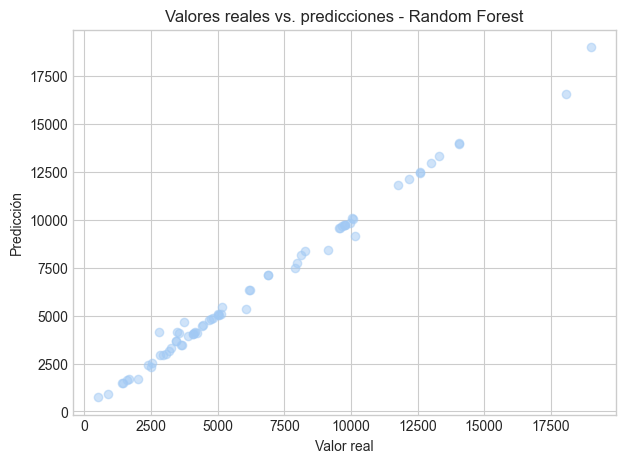

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Valores reales vs. predicciones - Random Forest")
plt.show()

Conclusiones:

- El modelo Random Forest muestra un rendimiento sólido, con errores bajos (MAE/RMSE) y un R² adecuado para datos comerciales reales.

-  La dispersión en el gráfico indica que el modelo captura bien la tendencia general del importe.

- El uso de OneHotEncoding permitió incluir variables categóricas sin problemas.

- Es un modelo estable, interpretativo y suficientemente robusto para un proyecto de nivel Fundamentos de IA.